In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import glob
import h5py
from tqdm import tqdm
import matplotlib.cm as cm
import matplotlib.colors as mcolors

In [2]:
# Load Exp Data
def load_ExpData(file_, idx_str_):
    
    # Open hdf5 file
    with h5py.File(file_, "r") as dataset:

        # Data
        return dict(freq_comb=np.asarray(dataset[idx_str_]["freq comb"]),
                    freq_pump=np.asarray(dataset[idx_str_]["freq pumps"]),
                    pump_pwr_data=np.asarray(dataset[idx_str_]["pump pwr sweep"]),
                    pump_phase_data=np.asarray(dataset[idx_str_]["pump phase sweep"]),
                    df=np.asarray(dataset[idx_str_]["df"]),
                    USB=np.asarray(dataset[idx_str_]["USB"]),
                    )

In [ ]:

file = r'/home/nanophys-meas/Desktop/Jai Master Thesis/Presto-Measurement-Scripts/I:/JPA-Data/2026-01/Covariance/2026-01-15_11_35_26.hdf5'
run = r'2026-01-15_11_35_26'


usb = load_ExpData(
    file_ = file,
    idx_str_= run
    )['USB']
usb=np.array(usb)

freqs = load_ExpData(
    file_ = file,
    idx_str_= run
    )['freq_comb']

len(usb)

Selected file: /home/nanophys-meas/Desktop/Jai Master Thesis/Presto-Measurement-Scripts/I:/JPA-Data/2026-01/2026-01.hdf5
Run: 2026-01


KeyError: "Unable to synchronously open object (object '2026-01' doesn't exist)"

In [339]:
freq_comb = load_ExpData(
    file_ = file,
    idx_str_= run
    )['freq_comb']

print(freq_comb)

freq_centre = freq_comb[len(freq_comb)//2]
print('Frequency Centre = ', freq_centre)

[4.40350e+09 4.40355e+09 4.40360e+09 4.40365e+09 4.40370e+09 4.40375e+09
 4.40380e+09 4.40385e+09 4.40390e+09 4.40395e+09 4.40400e+09 4.40405e+09
 4.40410e+09 4.40415e+09 4.40420e+09 4.40425e+09 4.40430e+09 4.40435e+09
 4.40440e+09 4.40445e+09 4.40450e+09]
Frequency Centre =  4404000000.0


(np.float64(0.267004), np.float64(0.004874), np.float64(0.329415), np.float64(1.0))


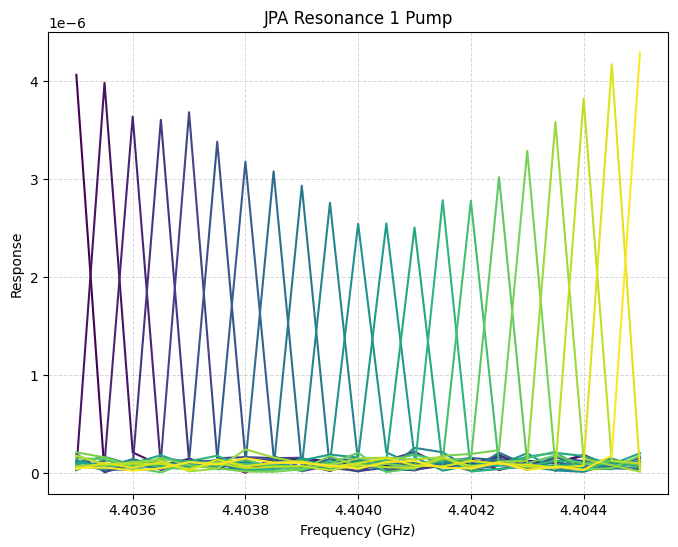

In [340]:
fig, ax = plt.subplots(figsize=(8,6))

# Plot

# Colormap and normalization
cmap = cm.viridis
norm = mcolors.Normalize(vmin=freqs[0], vmax=freqs[-1])

# Plotting
print(cmap(norm(0)))
for i in range(len(freqs)):
    colors = cmap(norm(freqs[i]))
    ax.plot(freqs/1e9,
            np.abs(resonance[i]), 
            color = colors,
            )

ax.set_title(
    f'JPA Resonance 1 Pump'
    )   

# Additional
ax.grid(ls='--', lw=0.7, alpha=0.5)
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel('Response')

# Save plot
plt.show()

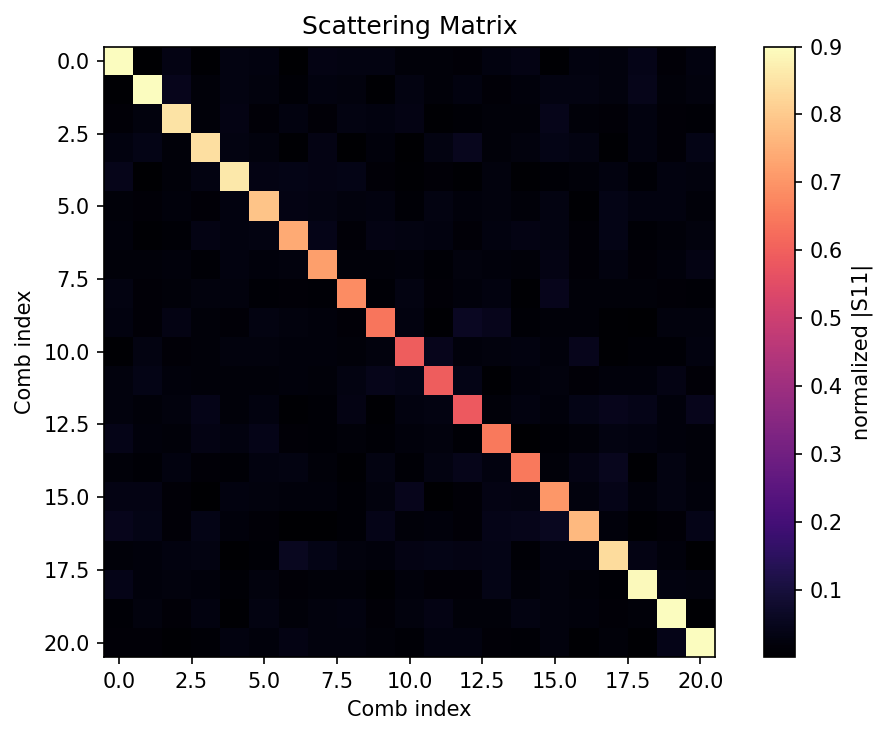

In [341]:
fig, ax = plt.subplots(figsize=(7, 5), dpi=150)

im = ax.imshow(
    np.abs(resonance) / np.max(np.abs(resonance)), 
    aspect='equal', 
    cmap='magma', 
    origin='upper',
    vmax=9e-1
    )

cbar = fig.colorbar(im, ax=ax)
cbar.set_label("normalized |S11|")

ax.set_xlabel("Comb index")
ax.set_ylabel("Comb index")
ax.set_title("Scattering Matrix")

plt.tight_layout()
#fig.savefig(f"/home/nanophys-meas/Desktop/Jai Master Thesis/Presto-Measurement-Scripts/Figures/LKIPA2_Scat95", dpi=300)
plt.show()

(np.float64(1.0), np.float64(0.9686274509803922), np.float64(0.984313725490196), np.float64(1.0))


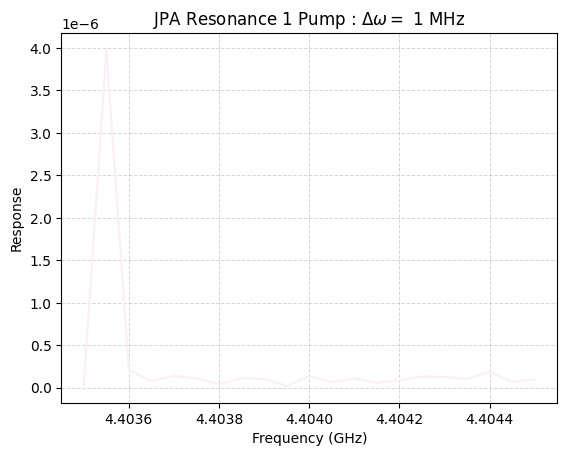

In [342]:
fig, ax = plt.subplots()

# Plot

#ax.plot(
 #   freqs/1e9, 
 #   np.abs(resonance)
 #   )   # Amp = 0.01

# Colormap and normalization
cmap = cm.PuBuGn
norm = mcolors.Normalize(vmin=freqs[0], vmax=freqs[-1])

# Plotting
print(cmap(norm(0)))

colors = cmap(norm(freqs[1]))
ax.plot(freqs/1e9,
        np.abs(resonance[1]), 
        color = colors,
        )


ax.set_title(
    f'JPA Resonance 1 Pump : $\\Delta \\omega = $ 1 MHz'
    )   

# Additional

ax.grid(ls='--', lw=0.7, alpha=0.5)
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel('Response')

# Save plot

plt.show()